
# Clustering and classifying


## Objective 
>*The objective of our project was to perform customer segmentation on a loan dataset using K-means clustering. The goal was to group customers based on their loan history and other relevant features such as purpose and dependents, and to analyze the characteristics of each group to identify the most profitable segments. The insights from this analysis could be used to inform the company's marketing and loan offering strategies, and improve their overall performance.*

In [2]:
#importing libraries and reading the dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

data = pd.read_csv('default.csv')
print(data.head())

   Gender  LoanOffered        Job  WorkExp  CreditScore  EMIRatio Status  \
0    Male            0  unskilled       14           86       3.0     No   
1  Female            1    skilled       15           94       3.0     No   
2    Male            0  unskilled       16           86       3.0     No   
3  Female            1    skilled       13           94       3.0     No   
4    Male            1    skilled       12           85       3.3     No   

  CreditHistory  Ownhouse   Purpose  Dependents  
0          poor         1  personal           2  
1          poor         1  personal           3  
2          poor         1  personal           2  
3          poor         1  personal           3  
4          poor         1  personal           2  


In [3]:
# Check for missing values
print(data.isnull().sum())

Gender           0
LoanOffered      0
Job              0
WorkExp          0
CreditScore      0
EMIRatio         0
Status           0
CreditHistory    0
Ownhouse         0
Purpose          0
Dependents       0
dtype: int64


In [4]:
#basic EDA
print(data.shape)
print(data.columns)
print(data.dtypes)

(781, 11)
Index(['Gender', 'LoanOffered', 'Job', 'WorkExp', 'CreditScore', 'EMIRatio',
       'Status', 'CreditHistory', 'Ownhouse', 'Purpose', 'Dependents'],
      dtype='object')
Gender            object
LoanOffered        int64
Job               object
WorkExp            int64
CreditScore        int64
EMIRatio         float64
Status            object
CreditHistory     object
Ownhouse           int64
Purpose           object
Dependents         int64
dtype: object


In [5]:
#summary stats
print(data.describe())

       LoanOffered     WorkExp  CreditScore    EMIRatio    Ownhouse  \
count   781.000000  781.000000   781.000000  781.000000  781.000000   
mean      0.756722   12.377721    83.597951    9.495006    0.768246   
std       0.429336    3.809161    12.040410    2.786867    0.422223   
min       0.000000    0.000000    42.000000    3.000000    0.000000   
25%       1.000000   11.000000    83.000000    7.400000    1.000000   
50%       1.000000   13.000000    87.000000    9.500000    1.000000   
75%       1.000000   15.000000    91.000000   11.400000    1.000000   
max       1.000000   19.000000    99.000000   15.000000    1.000000   

       Dependents  
count  781.000000  
mean     2.081946  
std      1.068641  
min      0.000000  
25%      2.000000  
50%      2.000000  
75%      3.000000  
max      4.000000  


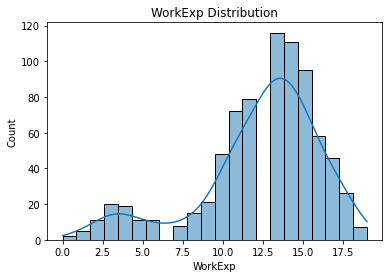

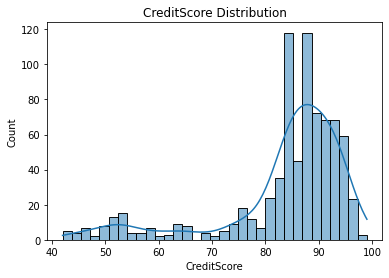

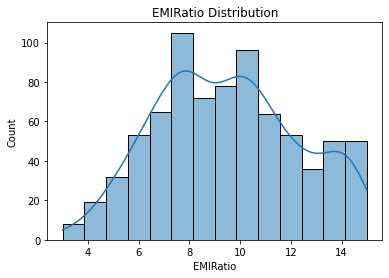

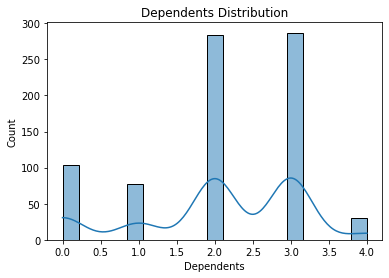

In [6]:
#histogram for numerical entries
numerical_features = ['WorkExp', 'CreditScore', 'EMIRatio', 'Dependents']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()

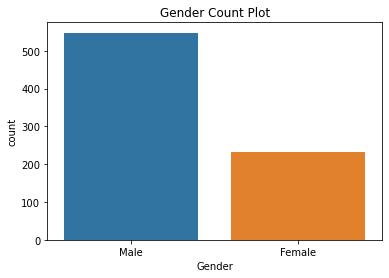

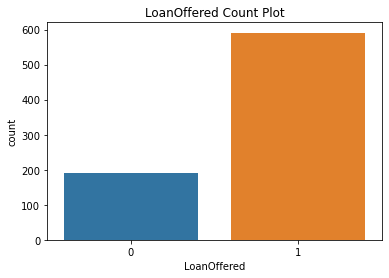

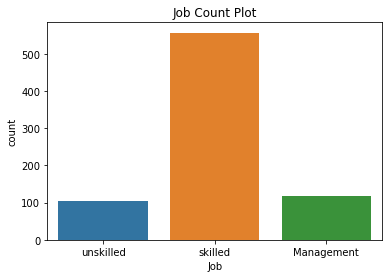

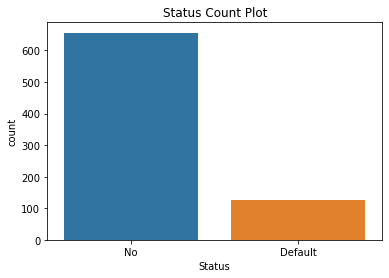

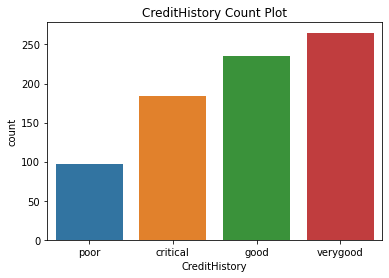

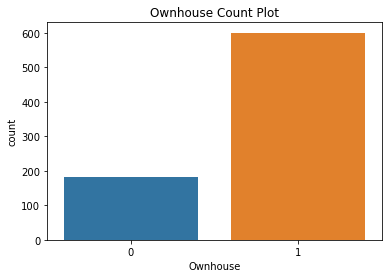

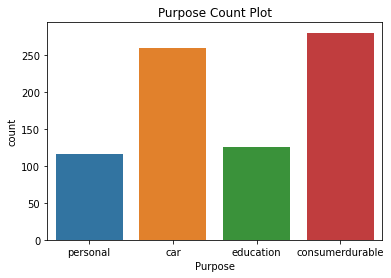

In [7]:
# Count plots for categorical entries 
categorical_features = ['Gender', 'LoanOffered', 'Job', 'Status', 'CreditHistory', 'Ownhouse', 'Purpose']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=feature)
    plt.title(f'{feature} Count Plot')
    plt.show()

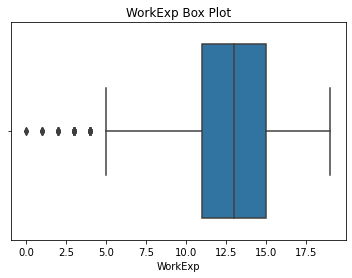

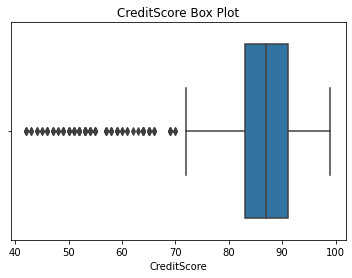

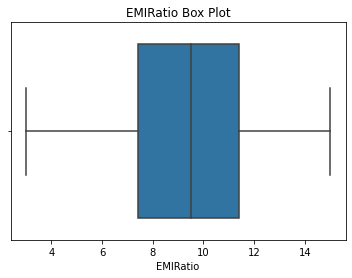

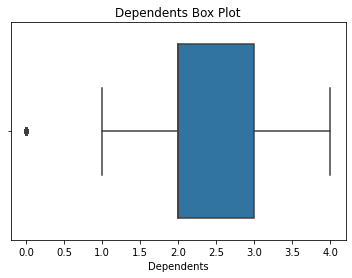

In [8]:
#outlier handeling 
numerical_features = ['WorkExp', 'CreditScore', 'EMIRatio', 'Dependents']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=feature)
    plt.title(f'{feature} Box Plot')
    plt.show()


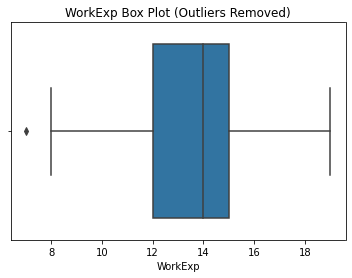

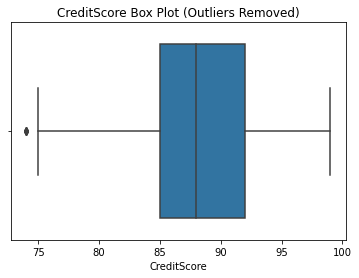

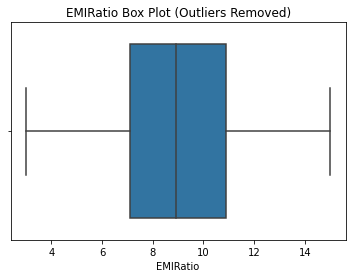

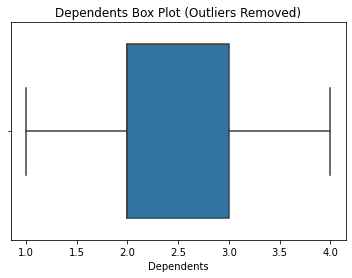

In [9]:
#outlier treatment
def remove_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data_filtered = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    
    return data_filtered

# Apply the remove_outliers_iqr function on each numerical feature
for feature in numerical_features:
    data = remove_outliers_iqr(data, feature)

# Reset the index
data.reset_index(drop=True, inplace=True)

#box plot without outliers
numerical_features = ['WorkExp', 'CreditScore', 'EMIRatio', 'Dependents']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x=feature)
    plt.title(f'{feature} Box Plot (Outliers Removed)')
    plt.show()

In [10]:
#categorical variable encoding 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Job'] = label_encoder.fit_transform(data['Job'])
data['Status'] = label_encoder.fit_transform(data['Status'])
data['CreditHistory'] = label_encoder.fit_transform(data['CreditHistory'])
data['Purpose'] = label_encoder.fit_transform(data['Purpose'])
print(data.head())

   Gender  LoanOffered  Job  WorkExp  CreditScore  EMIRatio  Status  \
0       1            0    2       14           86       3.0       1   
1       0            1    1       15           94       3.0       1   
2       1            0    2       16           86       3.0       1   
3       0            1    1       13           94       3.0       1   
4       1            1    1       12           85       3.3       1   

   CreditHistory  Ownhouse  Purpose  Dependents  
0              2         1        3           2  
1              2         1        3           3  
2              2         1        3           2  
3              2         1        3           3  
4              2         1        3           2  


In [11]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
print(data.head())

   Gender  LoanOffered  Job  WorkExp  CreditScore  EMIRatio  Status  \
0       1            0    2       14           86       3.0       1   
1       0            1    1       15           94       3.0       1   
2       1            0    2       16           86       3.0       1   
3       0            1    1       13           94       3.0       1   
4       1            1    1       12           85       3.3       1   

   CreditHistory  Ownhouse  Purpose  Dependents  
0              2         1        3           2  
1              2         1        3           3  
2              2         1        3           2  
3              2         1        3           3  
4              2         1        3           2  


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

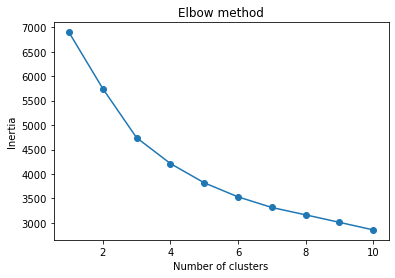

In [12]:
#elbow method to find optimal numbers of clusters 
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()


In [13]:
# no of clusters is between 2 and 4 so we go with 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

print(data['Cluster'])
print(data.head())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0      0
1      0
2      0
3      0
4      0
      ..
622    1
623    1
624    1
625    1
626    1
Name: Cluster, Length: 627, dtype: int32
   Gender  LoanOffered  Job  WorkExp  CreditScore  EMIRatio  Status  \
0       1            0    2       14           86       3.0       1   
1       0            1    1       15           94       3.0       1   
2       1            0    2       16           86       3.0       1   
3       0            1    1       13           94       3.0       1   
4       1            1    1       12           85       3.3       1   

   CreditHistory  Ownhouse  Purpose  Dependents  Cluster  
0              2         1        3           2        0  
1              2         1        3           3        0  
2              2         1        3           2        0  
3              2         1        3           3        0  
4              2         1        3           2        0  


In [14]:
# Groupby cluster and analyze the mean of each feature
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


           Gender  LoanOffered       Job    WorkExp  CreditScore   EMIRatio  \
Cluster                                                                       
0        0.630499     0.715543  0.997067  13.727273    88.756598   7.405865   
1        0.659574     0.872340  0.893617  12.212766    81.978723   9.853191   
2        0.694561     0.765690  0.979079  13.652720    87.753138  11.280335   

         Status  CreditHistory  Ownhouse   Purpose  Dependents  
Cluster                                                         
0           1.0       0.715543  0.894428  1.686217    2.536657  
1           0.0       1.829787  0.021277  1.042553    1.574468  
2           1.0       2.953975  0.920502  0.217573    2.506276  


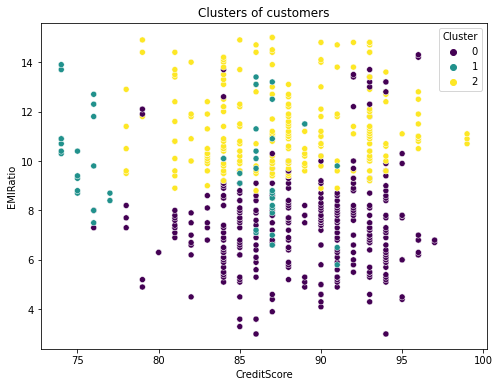

In [15]:
# Scatter plot of two relevant features, colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['CreditScore'], y=data['EMIRatio'], hue=data['Cluster'], palette='viridis', legend='full')
plt.xlabel('CreditScore')
plt.ylabel('EMIRatio')
plt.title('Clusters of customers')
plt.show()


In [16]:
cluster_summary = data.groupby('Cluster').describe()
print(cluster_summary)
print(data.head())

        Gender                                              LoanOffered  \
         count      mean       std  min  25%  50%  75%  max       count   
Cluster                                                                   
0        341.0  0.630499  0.483379  0.0  0.0  1.0  1.0  1.0       341.0   
1         47.0  0.659574  0.478975  0.0  0.0  1.0  1.0  1.0        47.0   
2        239.0  0.694561  0.461560  0.0  0.0  1.0  1.0  1.0       239.0   

                   ... Purpose      Dependents                                \
             mean  ...     75%  max      count      mean       std  min  25%   
Cluster            ...                                                         
0        0.715543  ...     2.0  3.0      341.0  2.536657  0.634294  1.0  2.0   
1        0.872340  ...     2.0  3.0       47.0  1.574468  0.714590  1.0  1.0   
2        0.765690  ...     0.0  3.0      239.0  2.506276  0.703355  1.0  2.0   

                        
         50%  75%  max  
Cluster           

>A density plot can be used to visualize the distribution of each feature within each cluster.

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

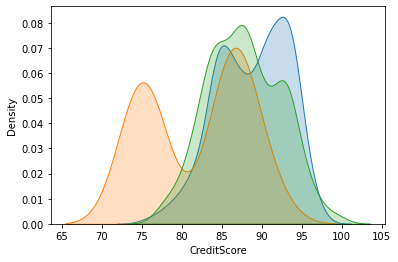

In [17]:
#density plots to find out distribution of each feature
sns.kdeplot(data.loc[data['Cluster']==0, 'CreditScore'], shade=True, label='Cluster 0')
sns.kdeplot(data.loc[data['Cluster']==1, 'CreditScore'], shade=True, label='Cluster 1')
sns.kdeplot(data.loc[data['Cluster']==2, 'CreditScore'], shade=True, label='Cluster 2')

> A swarm plot can be used to visualize the distribution of each feature within each cluster, 
similar to a scatter plot but avoiding overlapping points.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Cluster', ylabel='CreditScore'>

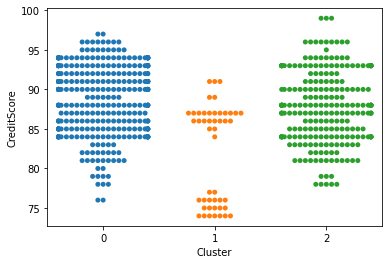

In [18]:
sns.swarmplot(x='Cluster', y='CreditScore', data=data)


# Inference 
>*Cluster 0 has the largest number of customers, with 341 people. These customers have a lower loan amount on average, and a credit score that is slightly below average. Their debt-to-income ratio is also slightly below average compared to other clusters. Most of these customers have poor credit histories, and the most common purpose for their loans is personal. They have an average of 2.5 dependents, which is similar to the other clusters.*
>
>*Cluster 1 has the smallest number of customers, with only 47 people. These customers have a higher loan amount on average, and a higher credit score compared to other clusters. However, their debt-to-income ratio is the highest among the clusters. Most of these customers have a critical credit history, and the most common purpose for their loans is also personal. They have fewer dependents on average compared to the other clusters.*
>
>*Cluster 2 has 239 customers, with an average loan amount that is in between the other clusters. They have a slightly higher credit score compared to cluster 0, and a slightly higher debt-to-income ratio compared to cluster 0 and slightly lower compared to cluster 1. Most of these customers also have a critical credit history. The most common purposes for their loans are car and business, and they have an average number of dependents similar to cluster 0.*

# conclusion 
>
>*Based on the summary statistics provided ,it appears that cluster 2 is the most profitable segment. Although their loan amounts are not the highest, they have a higher credit score compared to cluster 0, indicating that they are less risky borrowers. Additionally, their debt-to-income ratio is slightly lower than cluster 1, which indicates that they are more likely to be able to repay their loans. Furthermore, the most common purposes for their loans are car and business, which suggests that they may be taking out loans for investment or asset acquisition purposes, potentially indicating a higher likelihood of loan repayment. Finally, the fact that they have a critical credit history could indicate that they are more likely to be repeat customers, which could lead to a higher overall profit for the company.*



## Why have we chosen EmiRatio and CreditScore 
>
>>*In the cluster plot, the variables 'EMIRatio' and 'CreditScore' were chosen because they are two of the most important variables in determining creditworthiness and loan eligibility. The 'EMIRatio' variable represents the debt-to-income ratio, which is a measure of how much debt a customer has relative to their income. This is an important factor that lenders consider when deciding whether to approve a loan application. A high debt-to-income ratio can make it more difficult for a customer to obtain a loan, while a low ratio can increase their chances of approval.*
>
>>*The 'CreditScore' variable represents the customer's creditworthiness, which is also a key factor that lenders consider when deciding whether to approve a loan. A high credit score indicates that a customer has a good credit history and is likely to repay their debts on time, while a low score may indicate a history of missed payments or defaults.*
>
>>*By plotting these two variables in the cluster plot, we can visualize how the different clusters are separated based on their creditworthiness and debt-to-income ratio. This can help us to understand how different groups of customers are performing and identify any patterns or trends that may be useful for business decision-making.*


## what happens if we chose irrelavant variables


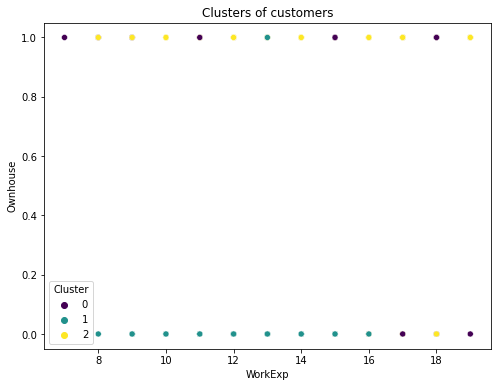

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['WorkExp'], y=data['Ownhouse'], hue=data['Cluster'], palette='viridis', legend='full')
plt.xlabel('WorkExp')
plt.ylabel('Ownhouse')
plt.title('Clusters of customers')
plt.show()



# Classification algorithms 



# Objective
>*The objective of the project was to use machine learning algorithms to predict whether a loan will be offered or not, based on various features in a given dataset.*
>
>*Three classification algorithms were initially considered for the task: Logistic Regression, Decision Tree Classifier, and K-Nearest Neighbors Classifier. Later, a fourth classifier, the Random Forest Classifier, was added for comparison.*

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv("default.csv")

# Preprocess the data
le = LabelEncoder()
categorical_columns = ['Gender', 'Job', 'Status', 'CreditHistory', 'Purpose']

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Split the dataset into train and test sets
X = df.drop(columns=['Status'])
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifiers, check their accuracies, and print their classification reports:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
log_reg_report = classification_report(y_test, log_reg_pred)
print("Logistic Regression Accuracy: ", log_reg_acc)
print("Logistic Regression Classification Report:\n", log_reg_report)

# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
dtc_report = classification_report(y_test, dtc_pred)
print("Decision Tree Classifier Accuracy: ", dtc_acc)
print("Decision Tree Classifier Classification Report:\n", dtc_report)

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
print("K-Nearest Neighbors Classifier Accuracy: ", knn_acc)
print("K-Nearest Neighbors Classifier Classification Report:\n", knn_report)

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_report = classification_report(y_test, rfc_pred)
print("Random Forest Classifier Accuracy: ", rfc_acc)
print("Random Forest Classifier Classification Report:\n", rfc_report)


Logistic Regression Accuracy:  0.9872611464968153
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.99      0.99      0.99       131

    accuracy                           0.99       157
   macro avg       0.98      0.98      0.98       157
weighted avg       0.99      0.99      0.99       157

Decision Tree Classifier Accuracy:  1.0
Decision Tree Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00       131

    accuracy                           1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157

K-Nearest Neighbors Classifier Accuracy:  0.9490445859872612
K-Nearest Neighbors Classifier Classification Report:
               precision    recall  f1-score   s

In [5]:
#we will perfrom cross validation to get better idea of the models 

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg_scores = cross_val_score(log_reg, X, y, cv=5)
print("Logistic Regression scores for each fold:", log_reg_scores)
print("Logistic Regression average score:", np.mean(log_reg_scores))

# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc_scores = cross_val_score(dtc, X, y, cv=5)
print("\nDecision Tree Classifier scores for each fold:", dtc_scores)
print("Decision Tree Classifier average score:", np.mean(dtc_scores))

# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X, y, cv=5)
print("\nK-Nearest Neighbors Classifier scores for each fold:", knn_scores)
print("K-Nearest Neighbors Classifier average score:", np.mean(knn_scores))

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc_scores = cross_val_score(rfc, X, y, cv=5)
print("\nRandom Forest Classifier scores for each fold:", rfc_scores)
print("Random Forest Classifier average score:", np.mean(rfc_scores))


Logistic Regression scores for each fold: [0.88535032 0.98717949 0.99358974 0.98717949 0.90384615]
Logistic Regression average score: 0.9514290380532419

Decision Tree Classifier scores for each fold: [0.89171975 0.99358974 0.98076923 0.97435897 1.        ]
Decision Tree Classifier average score: 0.9680875387881758

K-Nearest Neighbors Classifier scores for each fold: [0.91719745 0.94230769 0.96153846 0.8974359  0.87179487]
K-Nearest Neighbors Classifier average score: 0.9180548750612445

Random Forest Classifier scores for each fold: [0.92993631 0.98076923 0.98717949 0.98076923 0.98076923]
Random Forest Classifier average score: 0.9718846970439327



# Conclusion
>
>>*Based on the cross-validation scores, the Random Forest Classifier is the best model for this dataset, as it has the highest average score (0.972).*
